In [ ]:
from google.colab import files
files.upload()  #  to upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akshatmishra0108","key":"a02881b1d3dafaa2cd741021ae783d6b"}'}

In [ ]:
import os
import shutil

# Create the Kaggle directory if not exists
os.makedirs('/root/.kaggle', exist_ok=True)

# Move kaggle.json to the directory
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')      #shutil:- high level file operation like moving and copying

# Set permissions
os.chmod('/root/.kaggle/kaggle.json', 600)


In [ ]:
!pip install kaggle


In [ ]:
# List available datasets from Kaggle
!kaggle datasets list -s "neu metal surface defects"

ref                                       title                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------  ---------------------------------  -----  -------------------  -------------  ---------  ---------------  
fantacher/neu-metal-surface-defects-data  Metal Surface Defects Dataset       57MB  2020-07-16 15:11:32           5985         91  0.75             
yidazhang07/bridge-cracks-image            surface-defect-detection-dataset  151MB  2020-10-09 09:19:15           4094        100  0.8125           
toqaalaaawad/metal-surfaces-defects       Metal-surfaces-defects             936MB  2023-05-17 14:21:33             89          0  0.3125           


In [ ]:
!kaggle datasets download -d "fantacher/neu-metal-surface-defects-data"

Dataset URL: https://www.kaggle.com/datasets/fantacher/neu-metal-surface-defects-data
License(s): other
neu-metal-surface-defects-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip neu-metal-surface-defects-data.zip


Archive:  neu-metal-surface-defects-data.zip
replace NEU Metal Surface Defects Data/Thumbs.db? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: NEU Metal Surface Defects Data/Thumbs.db  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_1.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_10.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_100.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_101.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_102.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_103.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_104.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_105.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_106.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_107.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_108.bmp  
  inflating: NEU Metal Surface Defects Dat

In [ ]:
# Check extracted files
os.listdir("/content/NEU Metal Surface Defects Data")


['valid', 'test', 'train', 'Thumbs.db']

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
train_dir = '/content/NEU Metal Surface Defects Data/train' # Changed path to /content
val_dir = '/content/NEU Metal Surface Defects Data/valid'   # Changed path to /content
test_dir='/content/NEU Metal Surface Defects Data/test'    # Changed path to /content
print("Path Direcorty: ",os.listdir("/content/NEU Metal Surface Defects Data")) # Changed path to /content
print("Train Direcorty: ",os.listdir("/content/NEU Metal Surface Defects Data/train")) # Changed path to /content
print("Test Direcorty: ",os.listdir("/content/NEU Metal Surface Defects Data/test")) # Changed path to /content
print("Validation Direcorty: ",os.listdir("/content/NEU Metal Surface Defects Data/valid")) # Changed path to /content

Path Direcorty:  ['valid', 'test', 'train', 'Thumbs.db']
Train Direcorty:  ['Patches', 'Inclusion', 'Scratches', 'Pitted', 'Rolled', 'Crazing']
Test Direcorty:  ['Patches', 'Inclusion', 'Scratches', 'Pitted', 'Rolled', 'Crazing']
Validation Direcorty:  ['Patches', 'Inclusion', 'Scratches', 'Pitted', 'Rolled', 'Crazing']


In [ ]:
print("Training Inclusion data:",len(os.listdir(train_dir+'/'+'Inclusion')))

print("Testing Inclusion data:",len(os.listdir(test_dir+'/'+'Inclusion')))

print("Validation Inclusion data:",len(os.listdir(val_dir+'/'+'Inclusion')))

Training Inclusion data: 276
Testing Inclusion data: 12
Validation Inclusion data: 12


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf_keras


In [ ]:
!pip install --upgrade tensorflow

In [ ]:
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),    #2ndConvolution+pooling
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),   #3rdconvolution +pooling
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),     #2D-1D
    tf.keras.layers.Dense(256, activation='relu'),   #fully-connected with 256 neurons
    tf.keras.layers.Dropout(0.2),      #Randomly drops 20% neurons
    tf.keras.layers.Dense(6, activation='softmax')      #output layer has 6 neurons
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 199, 199, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 98, 98, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      18,874,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,917,734 (72.17 MB)

 Trainable params: 18,917,734 (72.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [ ]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=20,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 154s 915ms/step - accuracy: 0.2136 - loss: 2.2564 - val_accuracy: 0.6389 - val_loss: 1.0383
Epoch 2/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 145s 874ms/step - accuracy: 0.5275 - loss: 1.2844 - val_accuracy: 0.3194 - val_loss: 1.5114
Epoch 3/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 145s 871ms/step - accuracy: 0.6713 - loss: 0.9118 - val_accuracy: 0.8750 - val_loss: 0.7099
Epoch 4/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 146s 878ms/step - accuracy: 0.7759 - loss: 0.6932 - val_accuracy: 0.7500 - val_loss: 1.1629
Epoch 5/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 152s 913ms/step - accuracy: 0.7938 - loss: 0.6007 - val_accuracy: 0.9722 - val_loss: 0.1366
Epoch 6/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 147s 883ms/step - accuracy: 0.8244 - loss: 0.5236 - val_accuracy: 0.9583 - val_loss: 0.1795
Epoch 7/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 146s 879ms/step - accuracy: 0.8611 - loss: 0.3970 - val_accuracy: 0.9583 - val_loss: 0.1157
Epoch 8/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 145s 876ms/step - accuracy: 0.8654 -

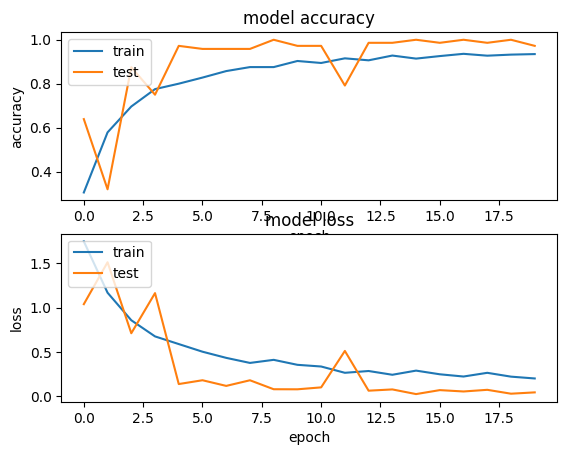

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

 # summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# First, we are going to load the file names and their respective target labels into numpy array!
from sklearn.datasets import load_files
import numpy as np

test_dir = '/content/NEU Metal Surface Defects Data/test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

x_test, y_test,target_labels = load_dataset(test_dir)

In [ ]:
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [ ]:
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test, no_of_classes)

In [ ]:
# We just have the file names in the x set. Let's load the images and convert them into array.
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


In [ ]:
x_test = x_test.astype('float32')/255

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 628ms/step


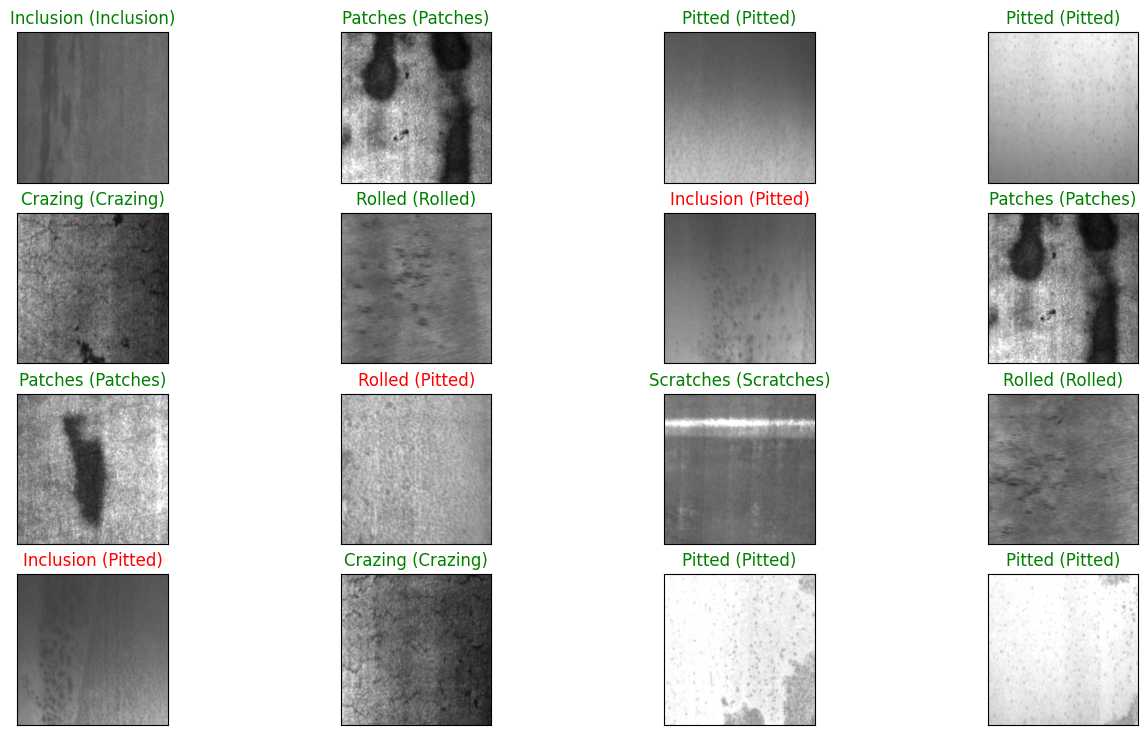

In [ ]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)

# plot a raandom sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset (Example: MNIST)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# ANN Model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input image
    Dense(128, activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),   # Second hidden layer
    Dense(10, activation='softmax') # Output layer (10 classes)
])

# Compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

# Evaluate model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"ANN Accuracy: {accuracy * 100:.2f}%")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8764 - loss: 0.4281 - val_accuracy: 0.9622 - val_loss: 0.1243
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9670 - loss: 0.1085 - val_accuracy: 0.9640 - val_loss: 0.1154
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9785 - loss: 0.0703 - val_accuracy: 0.9684 - val_loss: 0.1003
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9828 - loss: 0.0539 - val_accuracy: 0.9732 - val_loss: 0.0906
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9870 - loss: 0.0414 - val_accuracy: 0.9763 - val_loss: 0.0791
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9886 - loss: 0.0336 - val_accuracy: 0.9763 - val_loss: 0.0765
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9916 - loss: 0.0258 - val_accuracy: 0.9766 - val_loss: 0.0872
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9911 - loss: 0.0244 